# Capstone Project: The Battle of Neighborhoods

## Introduction/Business Problem

Canada is a country in the northern part of North America. It is also known as the second largest country by total area. The 2016 Canadian Census shows that between 2011 and 2016 its population grew by 1.7 million people, with immigrants accounting for two-thirds of the increase. Canada is known for its cultural diversity. The three largest metropolitan areas called Toronto, Montreal, and Vancouver accounts for major business developments and economic growth. Hence these places are the primary attractions for immigrants to settle down.

Toronto is an international center for business, finance, multinational organizations, educational institutions and sport activities. Thus, the scope for food industry is undeniably huge. The main objective of this project is to find the best neighborhoods in Toronto area for an entrepreneur to start an Indian restaurant.

## Data Acquisition

### Source 1: Wikipedia - List of postal codes of Canada


This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario.
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

### Source 2: Geospatial Data using Geocoder package

This is the list of geographical coordinates of the postal codes in Toronto. It is a CSV formatted file provided by Congnitive Class
https://cocl.us/Geospatial_data

### Source 3: Data from Foursquare

Foursquare is a technology company that built a massive dataset of location data. In this project we collect Toronto venue data from Foursquare 

## Methodology

Importing the necessary libraries required

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import json
import requests

from bs4 import BeautifulSoup
import xml

from sklearn.cluster import KMeans

!pip install geopy
from geopy.geocoders import Nominatim

! pip install folium==0.5.0
import folium 
 
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt
import seaborn as sns

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 4.8 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=bbe82094f635973b696b62849793d4ca699485790c13a8d8a350400ca1db3111
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


#### Extracting Postal codes from Wikipedia

In [3]:
Data_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
Data = requests.get(Data_url).text

Converting the text formatted data to table format using Beautiful Soup

In [4]:
Soup = BeautifulSoup(Data, 'xml')
Table = Soup.find('table')

In [5]:
# Creating a Pandas Dataframe with required attributes
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [6]:
# Inserting the data to dataframe through looping
for tr_cell in Table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
        
df.head()

Postalcode           Borough               Neighborhood
0        M1A      Not assigned               Not assigned
1        M2A      Not assigned               Not assigned
2        M3A        North York                  Parkwoods
3        M4A        North York           Victoria Village
4        M5A  Downtown Toronto  Regent Park, Harbourfront

#### Cleaning the Data

In [7]:
#Ignore cells with a borough that is Not assigned
df=df[df['Borough']!='Not assigned']

In [8]:
# If more than one neighborhood exits in one postal code, it will be combined into one separated by comma.
temp_df=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

df_merge = pd.merge(df, temp_df, on='Postalcode')
df_merge.drop(['Neighborhood'],axis=1,inplace=True)
df_merge.drop_duplicates(inplace=True)
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)
df_merge

Postalcode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   
15         M5C  Downtown Toronto   
16         M6C              York   
17         M9C         Etobicoke   
18         M1E       Scarborough   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
21         M6E              York   
22         M1G       Scarborough   
23         M4G         East York   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
26         M1H       Scarborough   
27         M2H        North York   
28         M3H        North York   
29         M4H         East York   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
32         M1J       Scarborough   
33         M2J        North York   
34         M3J        North York   
35         M4J         East York   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
38         M1K       Scarborough   
39         M2K        North York   
40         M3K        North York   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
44         M1L       Scarborough   
45         M2L        North York   
46         M3L        North York   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
49         M6L        North York   
50         M9L        North York   
51         M1M       Scarborough   
52         M2M        North York   
53         M3M        North York   
54         M4M      East Toronto   
55         M5M        North York   
56         M6M              York   
57         M9M        North York   
58         M1N       Scarborough   
59         M2N        North York   
60         M3N        North York   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
63         M6N              York   
64         M9N              York   
65         M1P       Scarborough   
66         M2P        North York   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
70         M9P         Etobicoke   
71         M1R       Scarborough   
72         M2R        North York   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
76         M7R       Mississauga   
77         M9R         Etobicoke   
78         M1S       Scarborough   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
82         M1T       Scarborough   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
85         M1V       Scarborough   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
88         M8V         Etobicoke   
89         M9V         Etobicoke   
90         M1W       Scarborough   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
93         M8W         Etobicoke   
94         M9W         Etobicoke   
95         M1X       Scarborough   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence 

In [9]:
# Getting geocodes using geocoder package
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

geo_df=pd.read_csv('http://cocl.us/Geospatial_data')
geo_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [73]:
#Merging the geo_data to the dataframe
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geo_data_merged = pd.merge(geo_df, df_merge, on='Postalcode')

geo_data_merged.head()

Postalcode   Latitude  Longitude      Borough  \
0        M1B  43.806686 -79.194353  Scarborough   
1        M1C  43.784535 -79.160497  Scarborough   
2        M1E  43.763573 -79.188711  Scarborough   
3        M1G  43.770992 -79.216917  Scarborough   
4        M1H  43.773136 -79.239476  Scarborough   

                             Neighborhood  
0                          Malvern, Rouge  
1  Rouge Hill, Port Union, Highland Creek  
2       Guildwood, Morningside, West Hill  
3                                  Woburn  
4                               Cedarbrae

In [11]:
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

#### Explore and cluster the neighborhoods in Toronto

In [12]:
toronto_data=geo_data_merged[geo_data_merged['Borough'].str.contains("Toronto")]
toronto_data.head()

Postalcode   Latitude  Longitude          Borough  \
37        M4E  43.676357 -79.293031     East Toronto   
41        M4K  43.679557 -79.352188     East Toronto   
42        M4L  43.668999 -79.315572     East Toronto   
43        M4M  43.659526 -79.340923     East Toronto   
44        M4N  43.728020 -79.388790  Central Toronto   

                      Neighborhood  
37                     The Beaches  
41    The Danforth West, Riverdale  
42  India Bazaar, The Beaches West  
43                 Studio District  
44                   Lawrence Park

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'E0NGVBEK1IPOINQOAZPCTY2M5H4DT3FGT2CGAP2YMCKUKBCK' # your Foursquare ID
CLIENT_SECRET = 'YYOIZAKUGTBOO1FN4KEWFIHEIJ0PG1M2JRH0OIGE02HVSPUD' # your Foursquare Secret
VERSION = '20201123'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E0NGVBEK1IPOINQOAZPCTY2M5H4DT3FGT2CGAP2YMCKUKBCK
CLIENT_SECRET:YYOIZAKUGTBOO1FN4KEWFIHEIJ0PG1M2JRH0OIGE02HVSPUD


Lets start by getting the coordinates for the city of Toronto 

In [15]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


Lets search for a specific venue category defining a query search for Indian restaurants nearby 1000 meters

In [17]:
search_query = 'Indian'
radius = 1000
LIMIT = 100
print(search_query + ' .... OK!')

Indian .... OK!


In [18]:
#Defining the URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=E0NGVBEK1IPOINQOAZPCTY2M5H4DT3FGT2CGAP2YMCKUKBCK&client_secret=YYOIZAKUGTBOO1FN4KEWFIHEIJ0PG1M2JRH0OIGE02HVSPUD&ll=43.6534817,-79.3839347&v=20201123&query=Indian&radius=1000&limit=100'

In [19]:
# Getting the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd6cf091d19b32474b76fd1'},
 'response': {'venues': [{'id': '4ad4c060f964a5206ff720e3',
    'name': '309 Dhaba Indian Excellence',
    'location': {'address': '309 King Street West',
     'lat': 43.64639421226189,
     'lng': -79.39041811187568,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.64639421226189,
       'lng': -79.39041811187568}],
     'distance': 946,
     'postalCode': 'M5V 1J5',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['309 King Street West',
      'Toronto ON M5V 1J5',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1607913225',
    'hasPerk': False},
   {'id': '4aef8854f

Transform the JSON to a Pandas Dataframe

In [20]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

#import the library to normalize the data
from pandas.io.json import json_normalize

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


id                          name  \
0  4ad4c060f964a5206ff720e3   309 Dhaba Indian Excellence   
1  4aef8854f964a5201cd921e3  Aroma Fine Indian Restaurant   
2  4b2a634af964a52020a824e3                Indian Flavour   
3  4afd920ff964a520ad2822e3         Indian Biriyani House   
4  4fea497c121d2480d3579412         Indian Biriyani House   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...  v-1607913225    False   
1  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...  v-1607913225    False   
2  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...  v-1607913225    False   
3  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...  v-1607913225    False   
4  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...  v-1607913225    False   

           location.address  location.lat  location.lng  \
0      309 King Street West     43.646394    -79.390418   
1            287 King St. W     43.646463    -79.389644   
2           123 Dundas St W     43.655649    -79.384119   
3           181 Dundas St W     43.655120    -79.386645   
4  120 Adelaide Street West     43.650050    -79.380662   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.64639421226189...                946   
1  [{'label': 'display', 'lat': 43.64646252150344...                906   
2  [{'label': 'display', 'lat': 43.65564910619165...                241   
3  [{'label': 'display', 'lat': 43.65511996683289...                284   
4  [{'label': 'display', 'lat': 43.65005028051833...                464   

  location.postalCode location.cc location.city location.state  \
0             M5V 1J5          CA       Toronto             ON   
1             M5V 1J5          CA       Toronto             ON   
2                 NaN          CA       Toronto             ON   
3             M5G 1C7          CA       Toronto             ON   
4             M5H 3V1          CA       Toronto             ON   

  location.country                          location.formattedAddress  \
0           Canada  [309 King Street West, Toronto ON M5V 1J5, Can...   
1           Canada  [287 King St. W (at John St.), Toronto ON M5V ...   
2           Canada  [123 Dundas St W (btw Elizabeth & Bay), Toront...   
3           Canada  [181 Dundas St W (W of Chestnut St), Toronto O...   
4           Canada  [120 Adelaide Street West (at Bay Street), Tor...   

  location.crossStreet  
0                  NaN  
1          at John St.  
2  btw Elizabeth & Bay  
3     W of Chestnut St  
4        at Bay Street

Defining information of interest and filter dataframe

In [21]:
# keep only columns that include venue name, and anything that is associated with the required location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name         categories                   address  \
0    309 Dhaba Indian Excellence  Indian Restaurant      309 King Street West   
1   Aroma Fine Indian Restaurant  Indian Restaurant            287 King St. W   
2                 Indian Flavour  Indian Restaurant           123 Dundas St W   
3          Indian Biriyani House  Indian Restaurant           181 Dundas St W   
4          Indian Biriyani House  Indian Restaurant  120 Adelaide Street West   
5          Mami's Indian Cuisine         Food Truck                       NaN   
6        Joe's Indian Restaurant  Indian Restaurant                       NaN   
7           Ram's Indian kitchen  Indian Restaurant              199 Bay St 6   
8         Touch - Indian Cuisine  Indian Restaurant          1 Adelaide St. E   
9    Jodpore Club Indian Cuisine  Indian Restaurant                       NaN   
10        Chadani Indian Cuisine  Indian Restaurant        51 Colborne Street   
11  Tamarind: The Indian Kitchen  Indian Restaurant           161 Bay St #230   
12     Amaya Fine Indian Cuisine  Indian Restaurant                       NaN   
13           Spice Indian Bistro  Indian Restaurant      320 Richmond St East   
14   Veda Healthy Indian Takeout  Indian Restaurant      10 Kings College Rd.   
15                     Autoshare             Office            26 Soho Street   

          lat        lng                                     labeledLatLngs  \
0   43.646394 -79.390418  [{'label': 'display', 'lat': 43.64639421226189...   
1   43.646463 -79.389644  [{'label': 'display', 'lat': 43.64646252150344...   
2   43.655649 -79.384119  [{'label': 'display', 'lat': 43.65564910619165...   
3   43.655120 -79.386645  [{'label': 'display', 'lat': 43.65511996683289...   
4   43.650050 -79.380662  [{'label': 'display', 'lat': 43.65005028051833...   
5   43.656986 -79.385840  [{'label': 'display', 'lat': 43.65698561897954...   
6   43.658150 -79.381563  [{'label': 'display', 'lat': 43.65814977325445...   
7   43.648026 -79.379819  [{'label': 'display', 'lat': 43.648025841, 'ln...   
8   43.649869 -79.378218  [{'label': 'display', 'lat': 43.64986899674456...   
9   43.655946 -79.393504  [{'label': 'display', 'lat': 43.655946, 'lng':...   
10  43.649153 -79.374814  [{'label': 'display', 'lat': 43.649153, 'lng':...   
11  43.646859 -79.378707  [{'label': 'display', 'lat': 43.646859, 'lng':...   
12  43.646989 -79.393345  [{'label': 'display', 'lat': 43.646989, 'lng':...   
13  43.653948 -79.369143  [{'label': 'display', 'lat': 43.653948, 'lng':...   
14  43.659806 -79.395084  [{'label': 'display', 'lat': 43.65980608863362...   
15  43.650428 -79.394434  [{'label': 'display', 'lat': 43.65042763460435...   

    distance postalCode  cc     city state country  \
0        946    M5V 1J5  CA  Toronto    ON  Canada   
1        906    M5V 1J5  CA  Toronto    ON  Canada   
2        241        NaN  CA  Toronto    ON  Canada   
3        284    M5G 1C7  CA  Toronto    ON  Canada   
4        464    M5H 3V1  CA  Toronto    ON  Canada   
5        419    M5G 2N2  CA  Toronto    ON  Canada   
6        553        NaN  CA      NaN   NaN  Canada   
7        691    M5L 1E2  CA  Toronto    ON  Canada   
8        611        NaN  CA  Toronto    ON  Canada   
9        818        NaN  CA  Toronto    ON  Canada   
10       878    M5E 0B7  CA  Toronto    ON  Canada   
11       849    M5J 2S1  CA  Toronto    ON  Canada   
12      1047        NaN  CA      NaN   NaN  Canada   
13      1192    M5A 2R3  CA  Toronto    ON  Canada   
14      1141    M5S 3G4  CA  Toronto    ON  Canada   
15       911    M5T 1Z6  CA  Toronto    ON  Canada   

                                     formattedAddress          crossStreet  \
0   [309 King Street West, Toronto ON M5V 1J5, Can...                  NaN   
1   [287 King St. W (at John St.), Toronto ON M5V ...          at John St.   
2   [123 Dundas St W (btw Elizabeth & Bay), Toront...  btw Elizabeth & Bay   
3   [181 Dundas St W (W of Chestnut St), Toronto O...     W of Chestnut St 

In [22]:
#Lets check the name of the results
dataframe_filtered.name

0      309 Dhaba Indian Excellence
1     Aroma Fine Indian Restaurant
2                   Indian Flavour
3            Indian Biriyani House
4            Indian Biriyani House
5            Mami's Indian Cuisine
6          Joe's Indian Restaurant
7             Ram's Indian kitchen
8           Touch - Indian Cuisine
9      Jodpore Club Indian Cuisine
10          Chadani Indian Cuisine
11    Tamarind: The Indian Kitchen
12       Amaya Fine Indian Cuisine
13             Spice Indian Bistro
14     Veda Healthy Indian Takeout
15                       Autoshare
Name: name, dtype: object

#### Let's visualize the Indian restaurants that are nearby City of Toronto

In [23]:
# Generate map centred around the Toronto Downtown
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# Add a red circle marker to represent Toronto Downtown
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Add the Indian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Creating a function to repeat the same process to iterate all the nearby venues in Toronto

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Creating a new dataframe called toronto_venues to have the nearby venues from the above function

In [25]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [26]:
toronto_venues.head()

Neighborhood  Neighborhood Latitude  \
0                   The Beaches              43.676357   
1                   The Beaches              43.676357   
2                   The Beaches              43.676357   
3                   The Beaches              43.676357   
4  The Danforth West, Riverdale              43.679557   

   Neighborhood Longitude                               Venue  Venue Latitude  \
0              -79.293031                   Glen Manor Ravine       43.676821   
1              -79.293031  The Big Carrot Natural Food Market       43.678879   
2              -79.293031                 Grover Pub and Grub       43.679181   
3              -79.293031                       Upper Beaches       43.680563   
4              -79.352188                            Pantheon       43.677621   

   Venue Longitude     Venue Category  
0       -79.293942              Trail  
1       -79.297734  Health Food Store  
2       -79.297215                Pub  
3       -79.292869       Neighborhood  
4       -79.351434   Greek Restaurant

In [27]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            55   
Brockton, Parkdale Village, Exhibition Place                           23   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Central Bay Street                                                     68   
Christie                                                               16   
Church and Wellesley                                                   75   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             33   
Davisville North                                                        9   
Dufferin, Dovercourt Village                                           13   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          25   
India Bazaar, The Beaches West                                         19   
Kensington Market, Chinatown, Grange Park                              74   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               45   
Moore Park, Summerhill East                                             2   
North Toronto West,  Lawrence Park                                     18   
Parkdale, Roncesvalles                                                 14   
Queen's Park, Ontario Provincial Government                            33   
Regent Park, Harbourfront                                              44   
Richmond, Adelaide, King                                              100   
Rosedale                                                                4   
Roselawn                                                                2   
Runnymede, Swansea                                                     33   
St. James Town                                                         85   
St. James Town, Cabbagetown                                            48   
Stn A PO Boxes                                                         96   
Studio District                                                        37   
Summerhill West, Rathnelly, South Hill, Forest ...                     14   
The Annex, North Midtown, Yorkville                                    19   
The Beaches                                                             4   
The Danforth West, Riverdale                                           43   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         34   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             55   
Brockton, Parkdale Village, Exhibition Place                            23   
Business reply mail Processing Centre, South Ce...                      16   
CN Tower, King and Spadina, Railway Lands, Harb...                      16   
Central Bay Street                                                      68   
Christie                                                                16   
Church and Wellesley                                                    75   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              33   
Davisville North                    

#### Analyze Each Neighborhood

In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto = toronto_onehot[fixed_columns]

toronto_onehot.head()

Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0                  0        0                   0             0   
1                  0        0                   0             0   
2                  0        0                   0             0   
3                  0        0                   0             0   
4                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0                 0                   0              0          0           0   
1                 0                   0              0          0           0   
2                 0                   0              0          0           0   
3                 0                   0              0          0           0   
4                 0                   0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  \
0           0       0     0    0                 0                   0      0   
1           0       0     0    0                 0                   0      0   
2           0       0     0    0                 0                   0      0   
3           0       0     0    0                 0                   0      0   
4           0       0     0    0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bistro  \
0                0         0           0                   0       0   
1                0         0           0                   0       0   
2                0         0           0                   0       0   
3                0         0           0                   0       0   
4                0         0           0                   0       0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0              0          0         0                     0               0   
1              0          0         0                     0               0   
2              0          0         0                     0               0   
3              0          0         0                     0               0   
4              0          0         0                     0               0   

   Brewery  Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0        0                0         0             0              0         0   
1        0                0         0             0              0         0   
2        0                0         0             0              0         0   
3        0                0         0             0              0         0   
4        0                0         0             0              0         0   

   Butcher  Café  Cajun / Creole Restaurant  Camera Store  Candy Store  \
0        0     0                          0             0            0   
1        0     0                          0             0            0   
2        0     0                          0             0            0   
3        0     0           

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Afghan Restaurant  \
0                                         Berczy Park           0.000000   
1        Brockton, Parkdale Village, Exhibition Place           0.000000   
2   Business reply mail Processing Centre, South C...           0.000000   
3   CN Tower, King and Spadina, Railway Lands, Har...           0.000000   
4                                  Central Bay Street           0.000000   
5                                            Christie           0.000000   
6                                Church and Wellesley           0.013333   
7                      Commerce Court, Victoria Hotel           0.000000   
8                                          Davisville           0.000000   
9                                    Davisville North           0.000000   
10                       Dufferin, Dovercourt Village           0.000000   
11             First Canadian Place, Underground city           0.000000   
12    Forest Hill North & West, Forest Hill Road Park           0.000000   
13                           Garden District, Ryerson           0.000000   
14  Harbourfront East, Union Station, Toronto Islands           0.000000   
15                      High Park, The Junction South           0.000000   
16                     India Bazaar, The Beaches West           0.000000   
17          Kensington Market, Chinatown, Grange Park           0.000000   
18                                      Lawrence Park           0.000000   
19                           Little Portugal, Trinity           0.000000   
20                        Moore Park, Summerhill East           0.000000   
21                 North Toronto West,  Lawrence Park           0.000000   
22                             Parkdale, Roncesvalles           0.000000   
23        Queen's Park, Ontario Provincial Government           0.000000   
24                          Regent Park, Harbourfront           0.000000   
25                           Richmond, Adelaide, King           0.000000   
26                                           Rosedale           0.000000   
27                                           Roselawn           0.000000   
28                                 Runnymede, Swansea           0.000000   
29                                     St. James Town           0.000000   
30                        St. James Town, Cabbagetown           0.000000   
31                                     Stn A PO Boxes           0.000000   
32                                    Studio District           0.000000   
33  Summerhill West, Rathnelly, South Hill, Forest...           0.000000   
34                The Annex, North Midtown, Yorkville           0.000000   
35                                        The Beaches           0.000000   
36                       The Danforth West, Riverdale           0.000000   
37           Toronto Dominion Centre, Design Exchange           0.000000   
38                     University of Toronto, Harbord           0.000000   

    Airport  Airport Food Court  Airport Gate  Airport Lounge  \
0    0.0000              0.0000        0.0000           0.000   
1    0.0000              0.0000        0.0000           0.000   
2    0.0000              0.0000        0.0000           0.000   
3    0.0625              0.0625        0.0625           0.125   
4    0.0000              0.0000        0.0000           0.000   
5    0.0000              0.0000        0.0000           0.000   
6    0.0000              0.0000        0.0000           0.000   
7    0.0000              0.0000        0.0000           0.000   
8    0.0000              0.0000        0.0000           0.000   
9    0.0000              0.0000        0.0000           0.000   
10   0.0000              0.0000        0.0000           0.000   
11   0.0000              0.0000        0.0000           0.000   
12   0.0000              0.0000        0.0000           0.000   
13   0.0000              0.0000        0.0000           0.000   
14   0.0000              

Iterating the Indian Restaurants from the grouped data

In [32]:
ind = toronto_grouped[["Neighborhood","Indian Restaurant"]]
ind.head()

Neighborhood  Indian Restaurant
0                                        Berczy Park           0.000000
1       Brockton, Parkdale Village, Exhibition Place           0.000000
2  Business reply mail Processing Centre, South C...           0.000000
3  CN Tower, King and Spadina, Railway Lands, Har...           0.000000
4                                 Central Bay Street           0.014706

### Clustering Neighborhoods

We use K-Means for clustering the data. Inorder to find out the value for K we use Elbow point method

In [36]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = ind.drop(['Neighborhood'], axis=1)

kmeans.fit(X)
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [37]:
#Get scores to figure out Elbow point 
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

scores = [get_inertia(x) for x in range(2, 21)]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller th

Text(0, 0.5, 'Error')

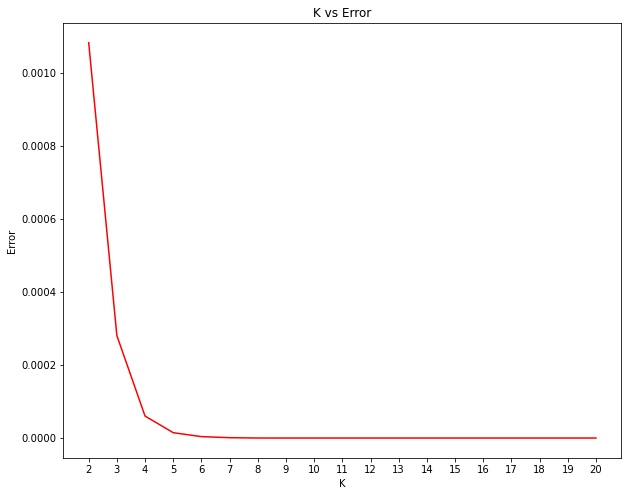

In [38]:
# plot the figure to get Elbow point
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

From the above figure the value for K = 4. Thus we run K-Means to cluster the Neighborhood into 4 clusters

In [42]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = ind.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 2, 0, 1, 0], dtype=int32)

In [45]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = ind.copy()
toronto_merged["Cluster Labels"] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

toronto_merged.head()

Neighborhood  Indian Restaurant  Cluster Labels  Neighborhood Latitude  \
0  Berczy Park                0.0               0              43.644771   
0  Berczy Park                0.0               0              43.644771   
0  Berczy Park                0.0               0              43.644771   
0  Berczy Park                0.0               0              43.644771   
0  Berczy Park                0.0               0              43.644771   

   Neighborhood Longitude                                      Venue  \
0              -79.373306       The Keg Steakhouse + Bar - Esplanade   
0              -79.373306                                       LCBO   
0              -79.373306                             Fresh On Front   
0              -79.373306                     Goose Island Brewhouse   
0              -79.373306  Hockey Hall Of Fame (Hockey Hall of Fame)   

   Venue Latitude  Venue Longitude                 Venue Category  
0       43.646712       -79.374768                     Restaurant  
0       43.642944       -79.372440                   Liquor Store  
0       43.647815       -79.374453  Vegetarian / Vegan Restaurant  
0       43.647329       -79.373541                       Beer Bar  
0       43.646974       -79.377323                         Museum

In [46]:
# sort the results by Cluster Labels
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

Neighborhood  Indian Restaurant  \
0                                         Berczy Park           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
24                          Regent Park, Harbourfront           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
25                           Richmond, Adelaide, King           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24                          Regent Park, Harbourfront           0.000000   
24           

In [47]:
# Finding the number of Indian Restaurants from the merged results
toronto_merged['Venue Category'].value_counts()['Indian Restaurant']

7

Thus we got 7 Indian Restaurants in Toronto. Lets visualize the results with selected neighborhoods

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [ i + x + ( i * x ) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## Results

### Cluster Analysis

In [57]:
# Create a new dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_cluster = df[['Borough', 'Neighborhood']]
df_cluster.head()

Borough                                 Neighborhood
2        North York                                    Parkwoods
3        North York                             Victoria Village
4  Downtown Toronto                    Regent Park, Harbourfront
5        North York             Lawrence Manor, Lawrence Heights
6  Downtown Toronto  Queen's Park, Ontario Provincial Government

#### Cluster 1

In [60]:
# Red 
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_cluster, cluster1, on='Neighborhood')
df_cluster1

Borough                                       Neighborhood  \
0     Downtown Toronto                          Regent Park, Harbourfront   
1     Downtown Toronto                          Regent Park, Harbourfront   
2     Downtown Toronto                          Regent Park, Harbourfront   
3     Downtown Toronto                          Regent Park, Harbourfront   
4     Downtown Toronto                          Regent Park, Harbourfront   
5     Downtown Toronto                          Regent Park, Harbourfront   
6     Downtown Toronto                          Regent Park, Harbourfront   
7     Downtown Toronto                          Regent Park, Harbourfront   
8     Downtown Toronto                          Regent Park, Harbourfront   
9     Downtown Toronto                          Regent Park, Harbourfront   
10    Downtown Toronto                          Regent Park, Harbourfront   
11    Downtown Toronto                          Regent Park, Harbourfront   
12    Downtown Toronto                          Regent Park, Harbourfront   
13    Downtown Toronto                          Regent Park, Harbourfront   
14    Downtown Toronto                          Regent Park, Harbourfront   
15    Downtown Toronto                          Regent Park, Harbourfront   
16    Downtown Toronto                          Regent Park, Harbourfront   
17    Downtown Toronto                          Regent Park, Harbourfront   
18    Downtown Toronto                          Regent Park, Harbourfront   
19    Downtown Toronto                          Regent Park, Harbourfront   
20    Downtown Toronto                          Regent Park, Harbourfront   
21    Downtown Toronto                          Regent Park, Harbourfront   
22    Downtown Toronto                          Regent Park, Harbourfront   
23    Downtown Toronto                          Regent Park, Harbourfront   
24    Downtown Toronto                          Regent Park, Harbourfront   
25    Downtown Toronto                          Regent Park, Harbourfront   
26    Downtown Toronto                          Regent Park, Harbourfront   
27    Downtown Toronto                          Regent Park, Harbourfront   
28    Downtown Toronto                          Regent Park, Harbourfront   
29    Downtown Toronto                          Regent Park, Harbourfront   
30    Downtown Toronto                          Regent Park, Harbourfront   
31    Downtown Toronto                          Regent Park, Harbourfront   
32    Downtown Toronto                          Regent Park, Harbourfront   
33    Downtown Toronto                          Regent Park, Harbourfront   
34    Downtown Toronto                          Regent Park, Harbourfront   
35    Downtown Toronto                          Regent Park, Harbourfront   
36    Downtown Toronto                          Regent Park, Harbourfront   
37    Downtown Toronto                          Regent Park, Harbourfront   
38    Downtown Toronto                          Regent Park, Harbourfront   
39    Downtown Toronto                          Regent Park, Harbourfront   
40    Downtown Toronto                          Regent Park, Harbourfront   
41    Downtown Toronto                          Regent Park, Harbourfront   
42    Downtown Toronto                          Regent Park, Harbourfront   
43    Downtown Toronto                          Regent Park, Harbourfront   
44    Downtown Toronto        Queen's Park, Ontario Provincial Government   
45    Downtown Toronto        Queen's Park, Ontario Provincial Government   
46    Downtown Toronto        Queen's Park, Ontario Provincial Government   
47    Downtown Toronto        Queen's Park, Ontario Provincial Government   
48    Downtown Toronto        Queen's Park, Ontario Provincial Government   
49    Downtown Toronto        Queen's Park, Ontario Provincial Government   
50    Downtown Toronto        Queen's Park, Ontario Provincial Government   
51    Downt

#### Cluster 2

In [63]:
# Green 
cluster2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_cluster, cluster2, on='Neighborhood')
df_cluster2['Venue Category'].value_counts(ascending=False)['Indian Restaurant']
df_cluster2

Borough                  Neighborhood  Indian Restaurant  \
0        East Toronto  The Danforth West, Riverdale           0.023256   
1        East Toronto  The Danforth West, Riverdale           0.023256   
2        East Toronto  The Danforth West, Riverdale           0.023256   
3        East Toronto  The Danforth West, Riverdale           0.023256   
4        East Toronto  The Danforth West, Riverdale           0.023256   
5        East Toronto  The Danforth West, Riverdale           0.023256   
6        East Toronto  The Danforth West, Riverdale           0.023256   
7        East Toronto  The Danforth West, Riverdale           0.023256   
8        East Toronto  The Danforth West, Riverdale           0.023256   
9        East Toronto  The Danforth West, Riverdale           0.023256   
10       East Toronto  The Danforth West, Riverdale           0.023256   
11       East Toronto  The Danforth West, Riverdale           0.023256   
12       East Toronto  The Danforth West, Riverdale           0.023256   
13       East Toronto  The Danforth West, Riverdale           0.023256   
14       East Toronto  The Danforth West, Riverdale           0.023256   
15       East Toronto  The Danforth West, Riverdale           0.023256   
16       East Toronto  The Danforth West, Riverdale           0.023256   
17       East Toronto  The Danforth West, Riverdale           0.023256   
18       East Toronto  The Danforth West, Riverdale           0.023256   
19       East Toronto  The Danforth West, Riverdale           0.023256   
20       East Toronto  The Danforth West, Riverdale           0.023256   
21       East Toronto  The Danforth West, Riverdale           0.023256   
22       East Toronto  The Danforth West, Riverdale           0.023256   
23       East Toronto  The Danforth West, Riverdale           0.023256   
24       East Toronto  The Danforth West, Riverdale           0.023256   
25       East Toronto  The Danforth West, Riverdale           0.023256   
26       East Toronto  The Danforth West, Riverdale           0.023256   
27       East Toronto  The Danforth West, Riverdale           0.023256   
28       East Toronto  The Danforth West, Riverdale           0.023256   
29       East Toronto  The Danforth West, Riverdale           0.023256   
30       East Toronto  The Danforth West, Riverdale           0.023256   
31       East Toronto  The Danforth West, Riverdale           0.023256   
32       East Toronto  The Danforth West, Riverdale           0.023256   
33       East Toronto  The Danforth West, Riverdale           0.023256   
34       East Toronto  The Danforth West, Riverdale           0.023256   
35       East Toronto  The Danforth West, Riverdale           0.023256   
36       East Toronto  The Danforth West, Riverdale           0.023256   
37       East Toronto  The Danforth West, Riverdale           0.023256   
38       East Toronto  The Danforth West, Riverdale           0.023256   
39       East Toronto  The Danforth West, Riverdale           0.023256   
40       East Toronto  The Danforth West, Riverdale           0.023256   
41       East Toronto  The Danforth West, Riverdale           0.023256   
42       East Toronto  The Danforth West, Riverdale           0.023256   
43    Central Toronto                    Davisville           0.030303   
44    Central Toronto                    Davisville           0.030303   
45    Central Toronto                    Davisville           0.030303   
46    Central Toronto                    Davisville           0.030303   
47    Central Toronto                    Davisville           0.030303   
48    Central Toronto                    Davisville           0.030303   
49    Central Toronto                    Davisville           0.030303   
50    Central Toronto                    Davisville           0.030303   
51    Central Toronto                    Davisville           0.030303   
52    Central Toronto                    Davisville           0.030303   
53    Central Toro

#### Cluster 3

In [65]:
# Violet
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_cluster, cluster3, on='Neighborhood')
df_cluster3['Venue Category'].value_counts(ascending=False)['Indian Restaurant']
df_cluster3

Borough                                       Neighborhood  \
0    Downtown Toronto                                 Central Bay Street   
1    Downtown Toronto                                 Central Bay Street   
2    Downtown Toronto                                 Central Bay Street   
3    Downtown Toronto                                 Central Bay Street   
4    Downtown Toronto                                 Central Bay Street   
5    Downtown Toronto                                 Central Bay Street   
6    Downtown Toronto                                 Central Bay Street   
7    Downtown Toronto                                 Central Bay Street   
8    Downtown Toronto                                 Central Bay Street   
9    Downtown Toronto                                 Central Bay Street   
10   Downtown Toronto                                 Central Bay Street   
11   Downtown Toronto                                 Central Bay Street   
12   Downtown Toronto                                 Central Bay Street   
13   Downtown Toronto                                 Central Bay Street   
14   Downtown Toronto                                 Central Bay Street   
15   Downtown Toronto                                 Central Bay Street   
16   Downtown Toronto                                 Central Bay Street   
17   Downtown Toronto                                 Central Bay Street   
18   Downtown Toronto                                 Central Bay Street   
19   Downtown Toronto                                 Central Bay Street   
20   Downtown Toronto                                 Central Bay Street   
21   Downtown Toronto                                 Central Bay Street   
22   Downtown Toronto                                 Central Bay Street   
23   Downtown Toronto                                 Central Bay Street   
24   Downtown Toronto                                 Central Bay Street   
25   Downtown Toronto                                 Central Bay Street   
26   Downtown Toronto                                 Central Bay Street   
27   Downtown Toronto                                 Central Bay Street   
28   Downtown Toronto                                 Central Bay Street   
29   Downtown Toronto                                 Central Bay Street   
30   Downtown Toronto                                 Central Bay Street   
31   Downtown Toronto                                 Central Bay Street   
32   Downtown Toronto                                 Central Bay Street   
33   Downtown Toronto                                 Central Bay Street   
34   Downtown Toronto                                 Central Bay Street   
35   Downtown Toronto                                 Central Bay Street   
36   Downtown Toronto                                 Central Bay Street   
37   Downtown Toronto                                 Central Bay Street   
38   Downtown Toronto                                 Central Bay Street   
39   Downtown Toronto                                 Central Bay Street   
40   Downtown Toronto                                 Central Bay Street   
41   Downtown Toronto                                 Central Bay Street   
42   Downtown Toronto                                 Central Bay Street   
43   Downtown Toronto                                 Central Bay Street   
44   Downtown Toronto                                 Central Bay Street   
45   Downtown Toronto                                 Central Bay Street   
46   Downtown Toronto                                 Central Bay Street   
47   Downtown Toronto                                 Central Bay Street   
48   Downtown Toronto                                 Central Bay Street   
49   Downtown Toronto                                 Central Bay Street   
50   Downtown Toronto                                 Central Bay Street   
51   Downtown Toronto                                 Central 

#### Cluster 4

In [66]:
#Blue
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_cluster, cluster4, on='Neighborhood')
df_cluster4['Venue Category'].value_counts(ascending=False)['Indian Restaurant']
df_cluster4

Borough                         Neighborhood  Indian Restaurant  \
0   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
1   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
2   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
3   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
4   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
5   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
6   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
7   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
8   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
9   Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
10  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
11  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
12  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
13  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
14  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
15  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
16  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
17  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   
18  Central Toronto  The Annex, North Midtown, Yorkville           0.052632   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0                3               43.67271              -79.405678   
1                3               43.67271              -79.405678   
2                3               43.67271              -79.405678   
3                3               43.67271              -79.405678   
4                3               43.67271              -79.405678   
5                3               43.67271              -79.405678   
6                3               43.67271              -79.405678   
7                3               43.67271              -79.405678   
8                3               43.67271              -79.405678   
9                3               43.67271              -79.405678   
10               3               43.67271              -79.405678   
11               3               43.67271              -79.405678   
12               3               43.67271              -79.405678   
13               3               43.67271              -79.405678   
14               3               43.67271              -79.405678   
15               3               43.67271              -79.405678   
16               3               43.67271              -79.405678   
17               3               43.67271              -79.405678   
18               3               43.67271              -79.405678   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       43.675650       -79.410255   
1                  Tim Hortons       43.675800       -79.403532   
2           Shoppers Drug Mart       43.674959       -79.407986   
3              Martino's Pizza       43.675560       -79.403558   
4                       Subway       43.675071       -79.406877   
5                         LCBO       43.675344       -79.405327   
6         The Annex Hodgepodge       43.674975       -79.406543   
7                   Pour House       43.675641       -79.403821   
8          Dish Cooking Studio       43.674066       -79.410764   
9             Toronto Archives       43.676447       -79.407509   
10           Creeds Coffee Bar       43.674100       -79.410838   
11                    Big Crow       43.675896       -79.403680   
12  Krispy Kreme Doughnut Cafe       43.674732       -79.407730   
13       Madame Boeuf And Flea       43.675240       -79.406620   
14        Jean Sibelius Square       43.67142

#### Lets check the number of neighborhoods per cluster

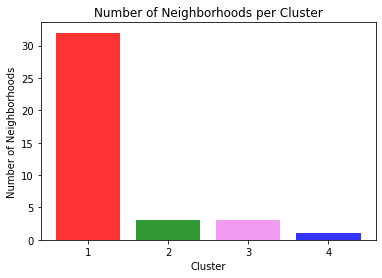

In [54]:
#Create clusters as objects
objects = (1,2,3,4)
y_pos = np.arange(len(objects))

performance = ind['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'Green','violet', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Number of Neighborhoods per Cluster')

plt.show()

In [55]:
ind['Cluster Labels'].value_counts()

0    32
2     3
1     3
3     1
Name: Cluster Labels, dtype: int64

#### Lets check the number of Indian restaurants in each clusters

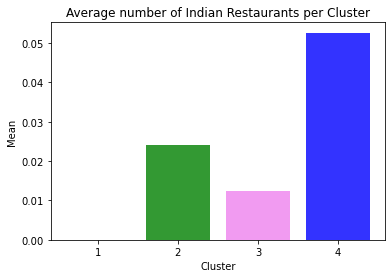

In [67]:
clusters_mean = [df_cluster1['Indian Restaurant'].mean(),df_cluster2['Indian Restaurant'].mean(),df_cluster3['Indian Restaurant'].mean(),
                 df_cluster4['Indian Restaurant'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'green','violet', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Indian Restaurants per Cluster')

plt.show()

## Observations

We have analyzed 4 clusters through K-means clustering. <br>
The Cluster 1 has the maximum number of neighbourhoods (32) but least (Zero) number of Indian restaurants. <br>
The Cluster 2 and Cluster 3 have three(3) neighborhoods each with average Indian restaurants of (0.023) and (0.014) as well <br>
The Cluster 4 has the least number of neighborhoods (1) but highest number of Indian restaurants (0.052) on average

## Conclusion

To conclude, it is no doubt that the scope of food business in a city like Toronto is limitless. The multicultural city is highly populated
and diversified.

Our analysis shows that, it is better recommended to start a restaurant in Cluster 1 neighbourhoods since they lack Indian cuisines eliminating
potential competition. Eventhough, there are variety of choices and multiple food outlets we found that the number of Indian restaurants are 
comparatively less. Since India contribute a plethora of immigrants and students to the population of Toronto, the success rate of 
establishing an Indian restaurant is very significant.
